In [22]:
# Check if R is running in Colab
R.version.string

[1] "R version 4.4.2 (2024-10-31)"

In [23]:
install.packages(c("dplyr", "readr"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [24]:
# Define file URLs
url_county_pop <- "https://raw.githubusercontent.com/opencasestudies/ocs-bp-opioid-rural-urban/master/data/simpler_import/county_pop_arcos.csv"
url_land_area <- "https://raw.githubusercontent.com/opencasestudies/ocs-bp-opioid-rural-urban/master/data/simpler_import/land_area.csv"
url_county_annual <- "https://raw.githubusercontent.com/opencasestudies/ocs-bp-opioid-rural-urban/master/data/simpler_import/county_annual.csv"

# Define file paths to save in Colab's /content/ directory
file_county_pop <- "/content/county_pop_arcos.csv"
file_land_area <- "/content/land_area.csv"
file_county_annual <- "/content/county_annual.csv"

# Download the files
download.file(url_county_pop, file_county_pop, method = "curl")
download.file(url_land_area, file_land_area, method = "curl")
download.file(url_county_annual, file_county_annual, method = "curl")

# Verify that the files exist
list.files("/content/")


[1] "county_annual.csv"    "county_pop_arcos.csv" "land_area.csv"       
[4] "sample_data"

In [27]:
# Load required libraries
library(dplyr)
library(readr)
library(tidyr)


# Read the file into a dataframe
df_county_annual <- read_csv("/content/county_annual.csv")
df_county_pop <- read_csv("/content/county_pop_arcos.csv")
df_land_area <- read_csv("/content/land_area.csv")

# Print dataset summaries
print(dim(df_county_annual))
print(dim(df_county_pop))
print(dim(df_land_area))

# Print column names to verify it was loaded
colnames(df_county_annual)

# Print the first few rows
##print(head(df_county_annual))


New names:
• `` -> `...1`
Rows: 27758 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): BUYER_COUNTY, BUYER_STATE, countyfips
dbl (4): ...1, year, count, DOSAGE_UNIT

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
New names:
• `` -> `...1`
Rows: 28265 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): BUYER_COUNTY, BUYER_STATE, countyfips, county_name, NAME, variable
dbl (5): ...1, STATE, COUNTY, year, population

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
New names:
• `` -> `...1`
Rows: 3198 Columns: 35
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (18): Areaname, STCOU, LND010190N1, LND0

[1] 27758     7
[1] 28265    11
[1] 3198   35


[1] "...1"         "BUYER_COUNTY" "BUYER_STATE"  "year"         "count"       
[6] "DOSAGE_UNIT"  "countyfips"

In [28]:
# Rename STCOU to countyfips in df_land_area
df_land_area <- df_land_area %>% rename(countyfips = STCOU)

# Convert data types for consistency
df_county_annual <- df_county_annual %>%
  mutate(year = as.integer(year), countyfips = as.integer(countyfips))

df_county_pop <- df_county_pop %>%
  mutate(year = as.integer(year), countyfips = as.integer(countyfips))

df_land_area <- df_land_area %>%
  mutate(countyfips = as.integer(countyfips))

In [29]:
df_merged <- df_county_annual %>%
  left_join(df_county_pop, by = c("year", "countyfips")) %>%
  left_join(df_land_area, by = "countyfips")

# Print first few rows after merging
print(head(df_merged))


# A tibble: 6 × 50
  ...1.x BUYER_COUNTY.x BUYER_STATE.x  year count DOSAGE_UNIT countyfips ...1.y
   <dbl> <chr>          <chr>         <int> <dbl>       <dbl>      <int>  <dbl>
1      1 ABBEVILLE      SC             2006   877      363620      45001   2313
2      2 ABBEVILLE      SC             2007   908      402940      45001   5455
3      3 ABBEVILLE      SC             2008   871      424590      45001   8597
4      4 ABBEVILLE      SC             2009   930      467230      45001  11737
5      5 ABBEVILLE      SC             2010  1197      539280      45001  14877
6      6 ABBEVILLE      SC             2011  1327      566560      45001  18017
# ℹ 42 more variables: BUYER_COUNTY.y <chr>, BUYER_STATE.y <chr>, STATE <dbl>,
#   COUNTY <dbl>, county_name <chr>, NAME <chr>, variable <chr>,
#   population <dbl>, ...1 <dbl>, Areaname <chr>, LND010190F <dbl>,
#   LND010190D <dbl>, LND010190N1 <chr>, LND010190N2 <chr>, LND010200F <dbl>,
#   LND010200D <dbl>, LND010200N1 <chr>, LND010200N

In [30]:
# compute per capita opiod pills
df_merged <- df_merged %>%
  mutate(opioid_pills_per_capita = ifelse(population > 0, DOSAGE_UNIT / population, NA))

# Print updated dataset
print(head(df_merged))


# A tibble: 6 × 51
  ...1.x BUYER_COUNTY.x BUYER_STATE.x  year count DOSAGE_UNIT countyfips ...1.y
   <dbl> <chr>          <chr>         <int> <dbl>       <dbl>      <int>  <dbl>
1      1 ABBEVILLE      SC             2006   877      363620      45001   2313
2      2 ABBEVILLE      SC             2007   908      402940      45001   5455
3      3 ABBEVILLE      SC             2008   871      424590      45001   8597
4      4 ABBEVILLE      SC             2009   930      467230      45001  11737
5      5 ABBEVILLE      SC             2010  1197      539280      45001  14877
6      6 ABBEVILLE      SC             2011  1327      566560      45001  18017
# ℹ 43 more variables: BUYER_COUNTY.y <chr>, BUYER_STATE.y <chr>, STATE <dbl>,
#   COUNTY <dbl>, county_name <chr>, NAME <chr>, variable <chr>,
#   population <dbl>, ...1 <dbl>, Areaname <chr>, LND010190F <dbl>,
#   LND010190D <dbl>, LND010190N1 <chr>, LND010190N2 <chr>, LND010200F <dbl>,
#   LND010200D <dbl>, LND010200N1 <chr>, LND010200N

In [31]:
df_yearly_avg <- df_merged %>%
  group_by(year) %>%
  summarise(avg_pills_per_capita = mean(opioid_pills_per_capita, na.rm = TRUE))

# Print yearly averages
print(df_yearly_avg)


# A tibble: 9 × 2
   year avg_pills_per_capita
  <int>                <dbl>
1  2006                 28.8
2  2007                 32.5
3  2008                 35.5
4  2009                 39.1
5  2010                 41.5
6  2011                 45.0
7  2012                 45.7
8  2013                 44.4
9  2014                 43.3


In [32]:
# save the data
write_csv(df_yearly_avg, "/content/opioid_yearly_avg.csv")
print("✅ Processed data saved as 'opioid_yearly_avg.csv'")


[1] "✅ Processed data saved as 'opioid_yearly_avg.csv'"


In [33]:
# Install ggplot2 if not installed
if (!require(ggplot2)) install.packages("ggplot2", dependencies = TRUE)

# Load ggplot2 for visualization
library(ggplot2)


Loading required package: ggplot2



Rows: 9 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (2): year, avg_pills_per_capita

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


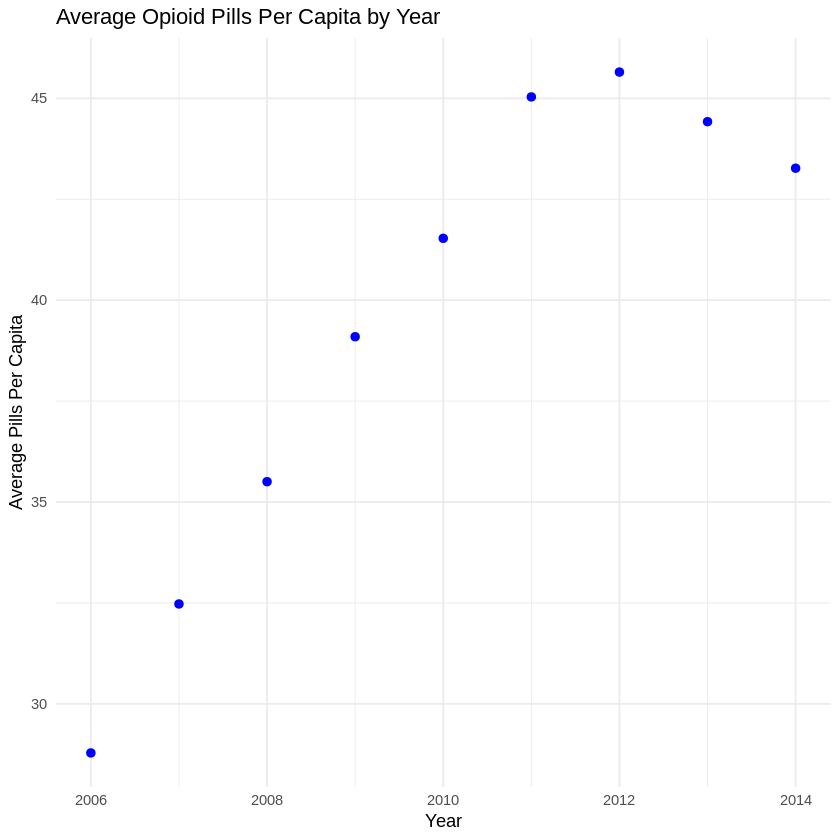

In [34]:
# Load the processed dataset
df_yearly_avg <- read_csv("/content/opioid_yearly_avg.csv")

# Create scatter plot
ggplot(df_yearly_avg, aes(x = year, y = avg_pills_per_capita)) +
  geom_point(color = "blue", size = 2) +  # Scatter points
  labs(title = "Average Opioid Pills Per Capita by Year",
       x = "Year",
       y = "Average Pills Per Capita") +
  theme_minimal()
